# L6 - A Brief Introduction of Keras

In [0]:
!pip install -q tensorflow==2.0.0-alpha0


In [0]:
import tensorflow as tf
from tensorflow import keras
import h5py
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-alpha0


## 1 - Data Washing


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
print(train_images.shape)

(60000, 28, 28)


In [0]:
print(train_labels.shape)

(60000,)


In [0]:
print(test_images.shape)

(10000, 28, 28)


In [0]:

print(test_labels.shape)

(10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

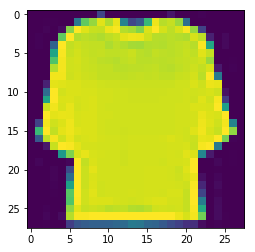

In [0]:
plt.figure()
plt.imshow(train_images[1976])
plt.show()

## 2 - Data Normalization

In [0]:
train_images = train_images / 255
test_images = test_images / 255

## 3 - Defining Model Structure

### 3.1 - Softmax Fuction
$$Softmax(Z) = (\frac{e^{z_0}}{\sum_{j = 0}^n e^{z_j}}, ..., \frac{e^{z_n}}{\sum_{j = 0}^n e^{z_j}}) ^ T$$

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

## 4 - Training

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5005 - accuracy: 0.8256
Epoch 2/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3747 - accuracy: 0.8664
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3389 - accuracy: 0.8756
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3150 - accuracy: 0.8848
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2956 - accuracy: 0.8912


## 5 - Evaluate

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3474 - accuracy: 0.8736


[0.34739938950538635, 0.8736]

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([2.7492657e-05, 2.6561660e-08, 1.6213838e-06, 3.2911176e-09,
       2.4907649e-06, 1.5128550e-02, 1.0557185e-05, 3.0206092e-02,
       4.0807877e-06, 9.5461905e-01], dtype=float32)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

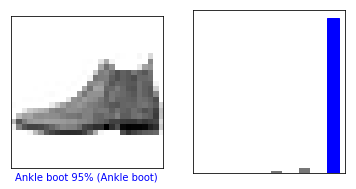

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

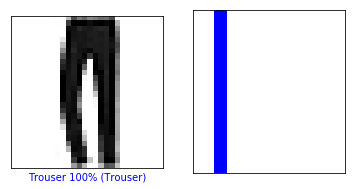

In [0]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

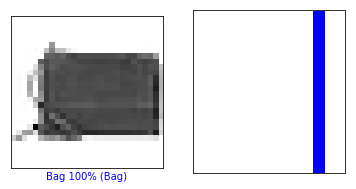

In [0]:
i = 18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

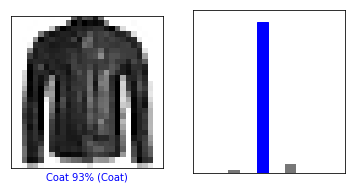

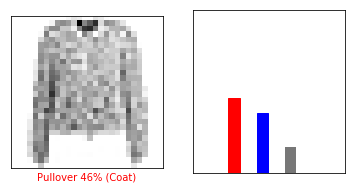

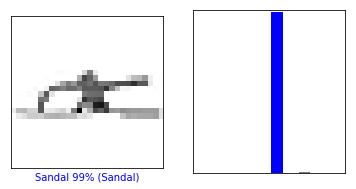

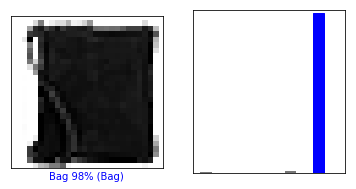

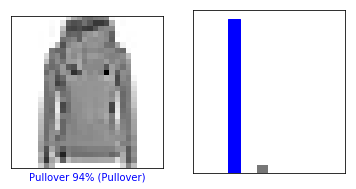

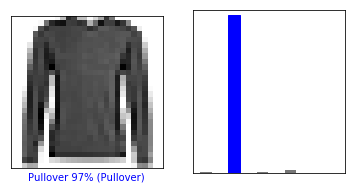

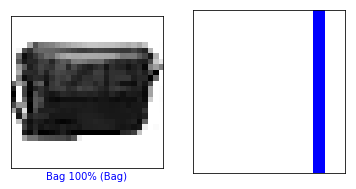

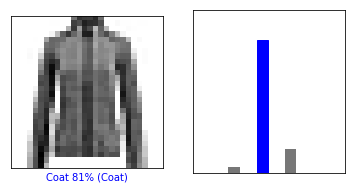

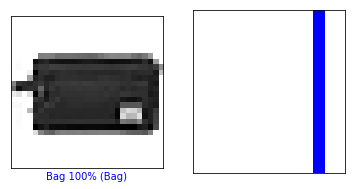

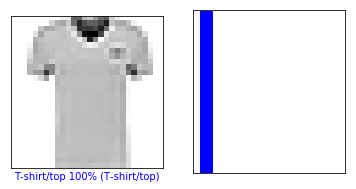

In [0]:
for i in range(50, 60):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions,  test_labels)
  plt.show()